<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML2_professor_resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Empregando o pacote statsmodel para construir regressões lineares simples e múltiplas**
---



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
#@title #**Fish Stock_Index_Price**
# adaptado de https://datatofish.com/multiple-linear-regression-python/
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

display(df[['Interest_Rate','Unemployment_Rate','Stock_Index_Price']])

,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


# Regressão Linear Simples


$$ \text{Stock_Index_Price} = a_0 + a_1 \times \text{Interest_Rate} $$



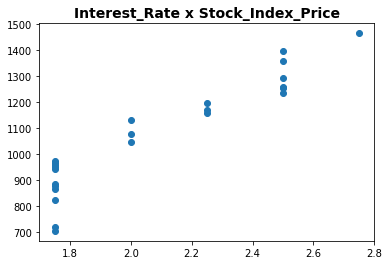

In [6]:
plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'])

plt.title('Interest_Rate x Stock_Index_Price', fontsize=14, weight='bold')
plt.show()

In [7]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='Stock_Index_Price ~ Interest_Rate', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.95e-11
Time:                        15:28:39   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -99.4643     95.210     -1.045

$$ \text{Stock_Index_Price} = -99.46 + 564.20 \times \text{Interest_Rate} $$

$$ R2 = 0.876 > 0.8 $$

# Predição

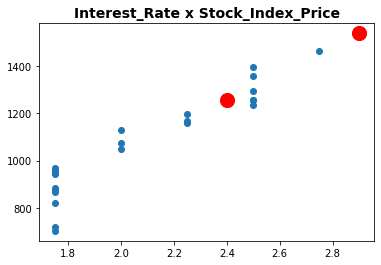

,Interest_Rate,Estimate Stock_Index_Price
0,2.4,1254.625023
1,2.9,1536.726969


In [20]:
new_data = pd.DataFrame({'Interest_Rate': [2.4, 2.9]})
estimated_values = lm.predict(new_data) 

plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'])

plt.scatter(new_data,estimated_values,s=200,c='r')

plt.title('Interest_Rate x Stock_Index_Price', fontsize=14, weight='bold')
plt.show()

new_data['Estimate Stock_Index_Price'] = estimated_values
display(new_data)

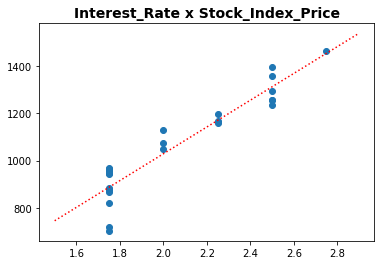

In [22]:
new_data = pd.DataFrame()
new_data['Interest_Rate'] = np.arange(1.5,3,0.1)

estimated_values = lm.predict(new_data) 

plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'])

plt.plot(new_data,estimated_values,'r:')

plt.title('Interest_Rate x Stock_Index_Price', fontsize=14, weight='bold')
plt.show()


# Regressão Linear Múltipla


$$ \text{Stock_Index_Price} = a_0 + a_1 \times \text{Interest_Rate}  + a_2 \times \text{Unemployment_Rate}$$



In [23]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='Stock_Index_Price ~ Interest_Rate + Unemployment_Rate', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           4.04e-11
Time:                        15:46:19   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1798.4040    899.24

$$ \text{Stock_Index_Price} = 1798.40 + 345.54 \times \text{Interest_Rate} + -250.14 \times \text{Unemployment_Rate}$$


$$ R2 = 0.898 > 0.8 $$

# Predição

In [24]:
new_data = pd.DataFrame({'Interest_Rate': [2.4, 2.9], 'Unemployment_Rate': [5.1, 6]})
estimated_values = lm.predict(new_data) 

new_data['Estimate Stock_Index_Price'] = estimated_values
display(new_data)

,Interest_Rate,Unemployment_Rate,Estimate Stock_Index_Price
0,2.4,5.1,1351.952672
1,2.9,6.0,1299.590802


# Todos os Modelos



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide5.PNG" width=800, align="center">